<a href="https://colab.research.google.com/github/faruq2021/My-ML-MODEL-NOTEBOOKS/blob/main/boston_house_price_data_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analysis using python begins by imprting the necessary libraries,
## the most commonly used ones includes the following:
    
1. Pnadas: This is a complete tool for data processing and manipulation in python.
2. Numpy: This one is used to convert large datasets of different types into N-dimensional arrays.
3. Seaborn, Matplotlib: These are data visualization libraries in python,Seaborn is a highlevel interface built on matplotlib.
4. Scikit-learn (also known as sklearn): This a machine learning library used by data anlyst,
    data scientist, and scienctific researchers, it has different algorithms ranging from Linear regression, to data classificatio and clustering.
    In this task we will be using the linear regression algorithm, since we are interest in the features that
    affects the housing price in bostons, and the relationship between them and the price.
    

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## The next step is to import the datasets we want to analyse, which is the Boston Housing dataset, this has already being dowloaded into our notebook from kaggle datasets repositiry.

In [3]:
data = pd.read_csv('/content/housing.csv')


# Data Exploration
After importing and reading the datasets, we have to carryout exploratory visualization of our datasets using some oandas methods, some datasets come with null values, inpure datasets, where a string type data could be found where there need to be only an integer type and the other way round.
1. we will view the fist 10 rows of the datasets
2. Info about the datasets, numbers of rows and columns
3. And the statistical summary of the datasets.

In [4]:
data.head(10) # To view the first 10 rows of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


The table above shows the first ten rows and all the 14 columns, using the "data.head()"method of pandas, you can view the first 5(default) rows of the table, you can specify values into the method if you have preference for the numbers of rows you want to view. I used ten so it returned the firts 10 rows starting from zero to nine.

In [5]:
data.info() # To get info about the dataset like number of entries, columns, data types etc.
data.describe() # To get statistical summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Using the "Data.info()" method, we can view the basic information of the data, it can be seen that the data is a type of pandas dataframe, it is the type with which pandas represnts tabular data with multiple columns.the data has 506 entries(rows) and 14 columns, it also has a table that lists the columns
0) CRIM: per capita crime rate by town

1) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

2) INDUS: proportion of non-retail business acres per town

3) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

4) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]

5) RM: average number of rooms per dwelling

6) AGE: proportion of owner-occupied units built prior to 1940

7) DIS: weighted distances to five Boston employment centres

8) RAD: index of accessibility to radial highways

9) TAX: full-value property-tax rate per $10,000 [$/10k]

10) PTRATIO: pupil-teacher ratio by town

11) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

12) LSTAT: % lower status of the population

13) MEDV: Median value of owner-occupied homes in $1000's [k$].

It also has the column index starting from 0 to 13, the amount of null values in each columns, as it can be seen, none of the 14 columns has any null value,it as well indicate the datatype for all the  coulmns, there are just two types of datatype in the data which are float and int, Rad and Tax only have int datatype while all others have float datatype.




Using the data.describe() method, we cn see it returned a table that displays some satistical variables like count,mean, standard deviation(std)m minimum value(min),first quartile (25%), second quartile(50%) and third quartile(75%) and maximun value(max) for each of the column.

## Data Cleaning
For the data i have chosen the data is already clean, this can be seen from the exploration of the data, there were no null values, null values are basically the impurities in the data that we might have to clean, null values may include the wrong data type in a partiular column or a missing value.
However to be sure there are no null values in the table, we can use the pandas method "data.isnull().sum()" to check for the total amount of null values in our dataset.



In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

The output above shows that there are no missing values, however this can not always be the situation, human collected data are not always perfect, misisng values may arise from data gathering during entry.
Missing data can be handled using pandas in different ways.
Mising data can be replaced with
1. The mean of th column where the missing data was noticed
2. The Mode in that column
3. Median.
I personal prefer to use mean

data = data.fillna(data["column name"].mean())

The column name is the name of the column where the missing data was found.


## Data Visualization

The next step is to use Seaborn and its bigger brother matplotlib to plot the pictural representation of our data. This will help to visualize the relationship between the features and the target variable.
The target variable is the MEDV and other 12 columns are the features.


<Axes: >

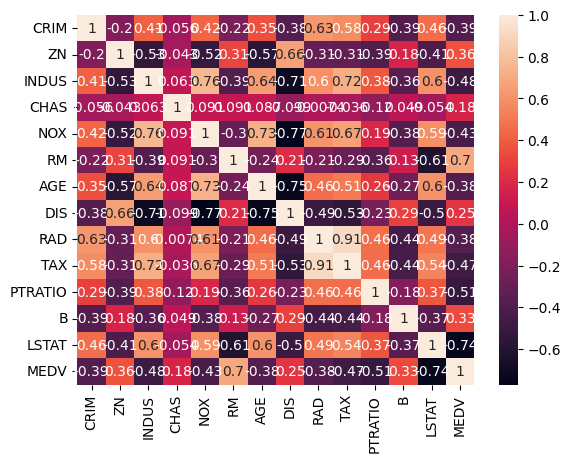

In [7]:
# Visualizing the correlation between features
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

The heatmap plot above uses colors to represent the direction of the relationship between the feature versus themesleves and that of each of them versus the target variable which is the MEDV.
The colors with very dark shades indicate very negative correlation while the light ones represent higly positive correlation. Positive indicates that there is a direct proprtional relationtip while negative indicates that there is an inverse proportional relationship.
For example,LSTAT has the most negative relationship with the MEDV, with the values of -0.74 has the darkest shade, with the color of black.


## Below i will print out the correlation values for each of the features against the target value.

In [8]:
correlations = data.corr()['MEDV'].drop('MEDV')
print(correlations)


CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Name: MEDV, dtype: float64


The correlation coefficients represent the strength and direction of the linear relationship between each feature and the target variable 'MEDV' (Median value of owner-occupied homes).

1. CRIM (-0.388305): This negative correlation suggests that as the per capita crime rate by town (CRIM) increases, the median value of owner-occupied homes (MEDV) tends to decrease. Therefore, towns with a higher crime rate tend to have lower housing prices.

2. ZN (0.360445): This positive correlation suggests that as the proportion of residential land zoned for lots over 25,000 sq.ft. (ZN) increases, the median value of owner-occupied homes (MEDV) tends to increase. Therefore, towns with larger residential zones tend to have higher housing prices.


3. INDUS (-0.483725): This negative correlation suggests that as the proportion of non-retail business acres per town (INDUS) increases, the median value of owner-occupied homes (MEDV) tends to decrease. Therefore, towns with more non-retail business areas tend to have lower housing prices.

4. CHAS (0.175260): This positive correlation suggests that properties that bound the Charles River (CHAS) tend to have higher median values. However, the correlation is relatively weak compared to other variables.

5. NOX (-0.427321): This negative correlation suggests that as the nitric oxides concentration (parts per 10 million) (NOX) increases, the median value of owner-occupied homes (MEDV) tends to decrease. Therefore, areas with higher nitric oxide concentrations tend to have lower housing prices.

6. RM (0.695360): This positive correlation suggests that as the average number of rooms per dwelling (RM) increases, the median value of owner-occupied homes (MEDV) tends to increase. Therefore, houses with more rooms tend to be more expensive.

7. AGE (-0.376955): This negative correlation suggests that the older the proportion of owner-occupied units built prior to 1940 (AGE), the lower the median value of owner-occupied homes (MEDV). Therefore, older houses tend to be less expensive.

8. DIS (0.249929): This positive correlation suggests that as the weighted distances to five Boston employment centres (DIS) increase, the median value of owner-occupied homes (MEDV) tends to increase. Therefore, houses further away from the employment centres tend to be more expensive.

9. RAD (-0.381626): This negative correlation suggests that as the index of accessibility to radial highways (RAD) increases, the median value of owner-occupied homes (MEDV) tends to decrease. Therefore, houses with easier access to highways tend to be less expensive.

10. TAX (-0.468536): This negative correlation suggests that as the full-value property-tax rate per $10,000 (TAX) increases, the median value of owner-occupied homes (MEDV) tends to decrease. Therefore, areas with higher property tax rates tend to have lower housing prices.

11. PTRATIO (-0.507787): This negative correlation suggests that as the pupil-teacher ratio by town (PTRATIO) increases, the median value of owner-occupied homes (MEDV) tends to decrease. Therefore, areas with higher pupil-teacher ratios tend to have lower housing prices.

12. B (0.333461): This positive correlation suggests that as the proportion of blacks by town (B) increases, the median value of owner-occupied homes (MEDV) tends to increase. Therefore, areas with a higher proportion of blacks tend to have higher housing prices.

13. LSTAT (-0.737663): This negative correlation suggests that as the percentage of lower status of the population (LSTAT) increases, the median value of owner-occupied homes (MEDV) tends to decrease. Therefore, areas with a higher percentage of lower status population tend to have lower housing prices.

The scatter plot below further helps to visualize this correlation.

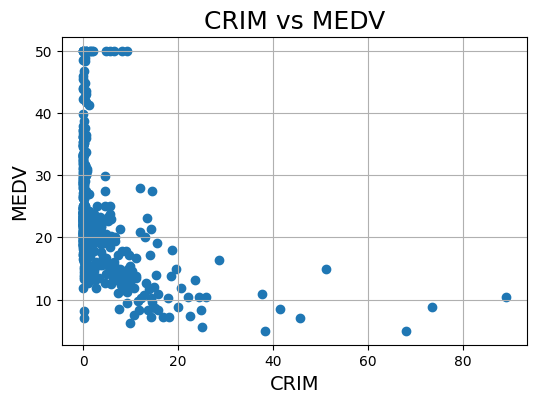

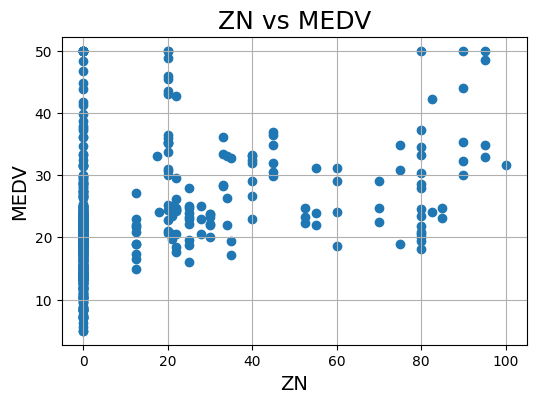

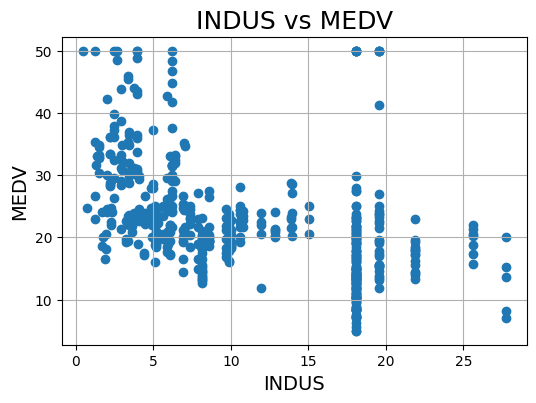

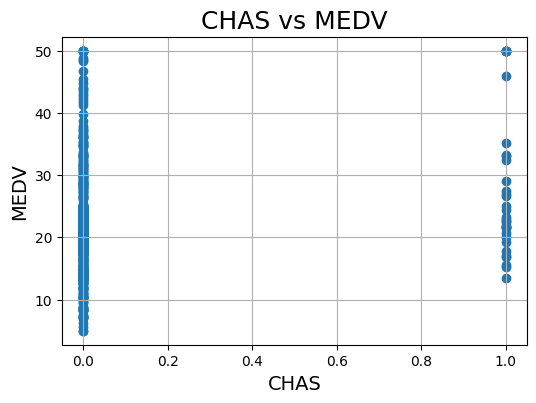

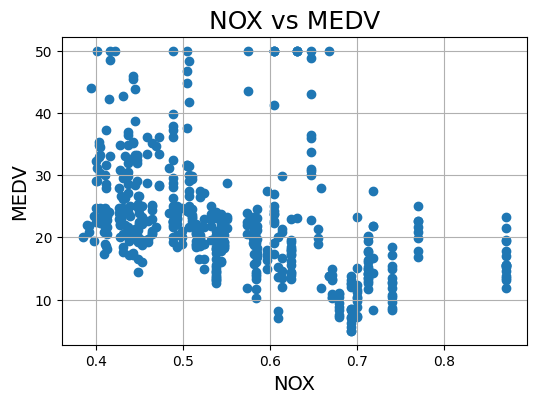

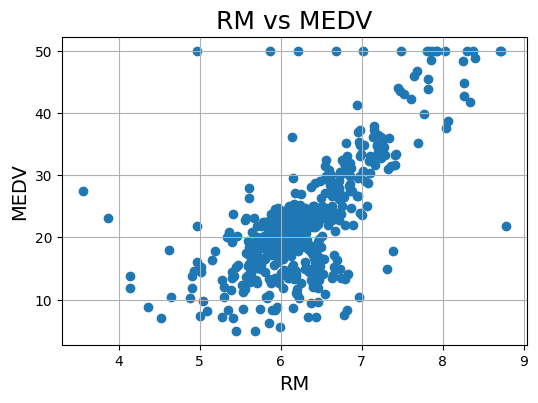

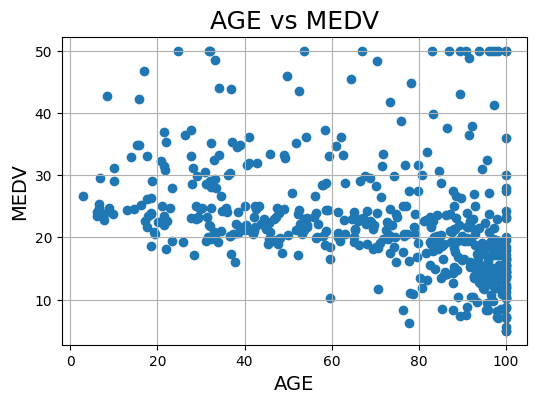

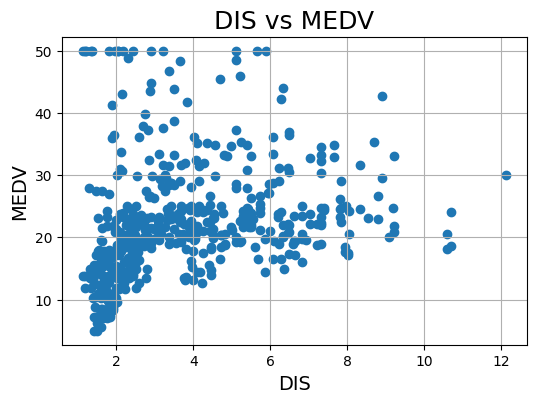

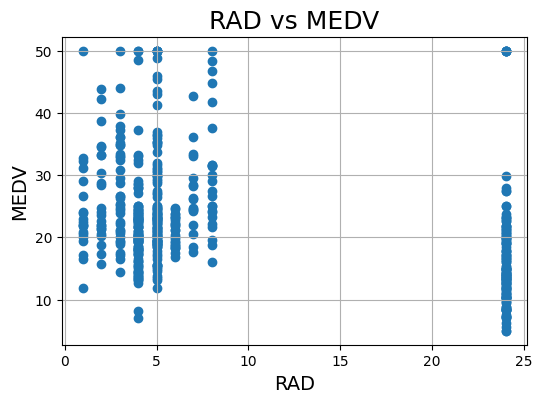

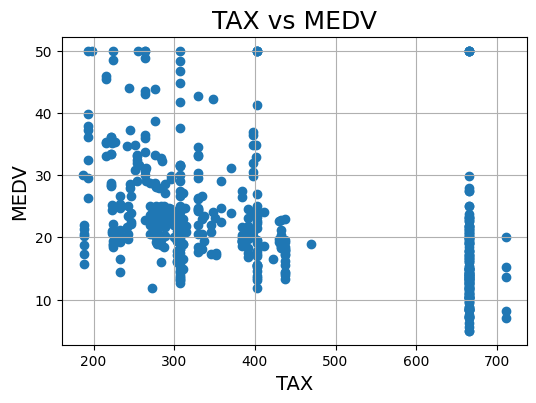

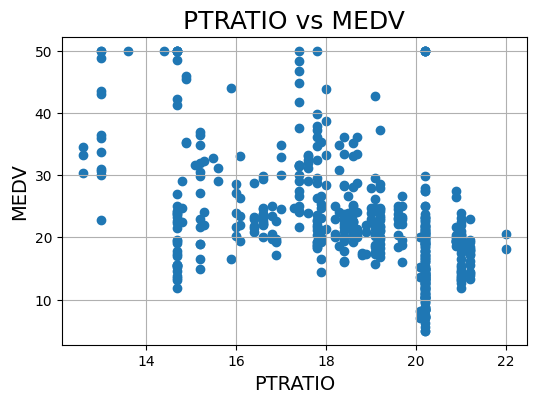

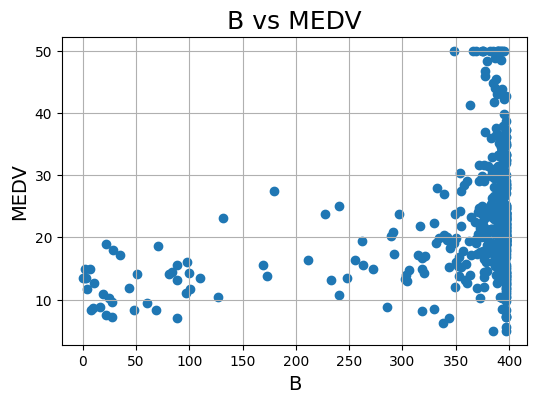

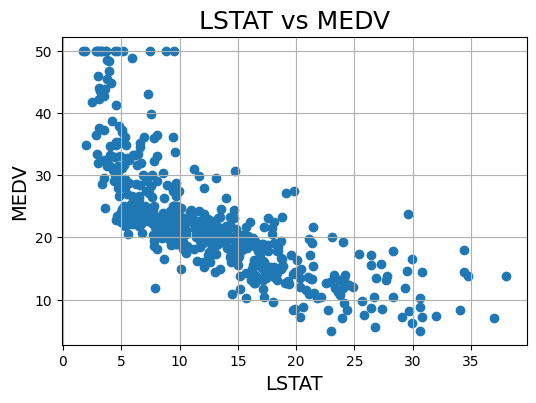

In [9]:
features = data.columns[:-1]  # Exclude the target variable 'MEDV'
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(data[feature], data['MEDV'])
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('MEDV', fontsize=14)
    plt.title(f'{feature} vs MEDV', fontsize=18)
    plt.grid(True)
    plt.show()

**Model Development and Evaluation**

Let's develop a simple linear regresion model.


## 1. Using a simple linear regression

In [10]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 3.189091965887837
RMSE: 4.928602182665332


## 2. Using xgboost regressor.


In [11]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)


xgb_predictions = xgb_model.predict(X_test)


mae = metrics.mean_absolute_error(y_test, xgb_predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, xgb_predictions))

print('MAE:', mae)
print('RMSE:', rmse)

MAE: 1.9574996602301502
RMSE: 2.561352625433185


## 3. Using support vector regressor SVR

In [12]:
from sklearn.svm import SVR


svr_model = SVR()
svr_model.fit(X_train, y_train)


svr_predictions = svr_model.predict(X_test)


mae = metrics.mean_absolute_error(y_test, svr_predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, svr_predictions))

print('MAE:', mae)
print('RMSE:', rmse)


MAE: 4.530585721759495
RMSE: 7.269000327965785


## 4. Using  Orthogonal Projections to Latent Structures (OPLS)

In [13]:
from sklearn.cross_decomposition import PLSRegression


opls_model = PLSRegression(n_components=1)
opls_model.fit(X_train, y_train)


opls_predictions = opls_model.predict(X_test)


mae = metrics.mean_absolute_error(y_test, opls_predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, opls_predictions))

print('MAE:', mae)
print('RMSE:', rmse)


MAE: 4.088034136211565
RMSE: 5.983022900434176


* ## Model Performace Analysis

MAE (Mean Absolute Error): The MAE is a measure of the average absolute difference between the predicted house prices and the actual house prices.

RMSE (Root Mean Squared Error): The RMSE is a measure of the standard deviation of the residuals, which represents the difference between the predicted house prices and the actual house prices.

We have built four different models using different algorithms:

simple linear regression

xgboost regressor

support vector regressor

Orthogonal Projections to Latent Structures (OPLS)

From the result of their individual model evaluations, it can be seen that xgboost regressor with the least value for MAE and RMSE is the best performing model.
This can serve as a reference to help quickly decide which of the algorithms one can opt for when we have a dataset that resembles the the bostonhousing dataset.
